<a href="https://colab.research.google.com/github/jiin124/Dacon/blob/main/%EC%87%BC%ED%95%91%EB%AA%B0_%EC%A7%80%EC%A0%90%EB%B3%84_%EB%A7%A4%EC%B6%9C%EC%95%A1_%EC%98%88%EC%B8%A1/%EC%87%BC%ED%95%91%EB%AA%B0_%EC%A7%80%EC%A0%90%EB%B3%84_%EB%A7%A4%EC%B6%9C%EC%95%A1_%EC%98%88%EC%B8%A1_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 쇼핑몰 지점별 매출액 예측


https://dacon.io/competitions/official/235942/data

## train data
- id : 샘플 아이디
- Store : 쇼핑몰 지점
- Date : 주 단위(Weekly) 날짜
- Temperature : 해당 쇼핑몰 주변 기온
- Fuel_Price : 해당 쇼핑몰 주변 연료 가격
- Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보
- Unemployment : 해당 쇼핑몰 지역의 실업률
- IsHoliday : 해당 기간의 공휴일 포함 여부
- Weekly_Sales : 주간 매출액 (목표 예측값)


## test data

- id : 샘플 아이디
- Store : 쇼핑몰 지점
- Date : 주 단위(Weekly) 날짜
- Temperature : 해당 쇼핑몰 주변 기온
- Fuel_Price : 해당 쇼핑몰 주변 연료 가격
- Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보
- Unemployment : 해당 쇼핑몰 지역의 실업률
- IsHoliday : 해당 기간의 공휴일 포함 여부

어떤 프로모션을 진행해야 판매량이 올라갈까요?💥

매장 주변의 날씨가 판매량에 영향을 미치지는 않을까요?🌞

혹은 지역 사회의 실업률도 영향을 미칠 수 있지 않을까요?



쇼핑몰 매장별 프로모션 정보, 주변 날씨, 실업률, 연료 가격 등의 정보를 바탕으로

쇼핑몰의 각 지점별 주간 매출액을 예측해주세요!

## 해볼 것
- 군집분석


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
#한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager,rc

font_path="/content/drive/MyDrive/NanumSquareB.ttf"
font=font_manager.FontProperties(fname=font_path)

In [ ]:
plt.rc('font',family='NanumBarunGothic')

NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
sample=pd.read_csv('/content/sample_submission.csv')

In [ ]:
train.isna().sum()

id                 0
Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

In [ ]:
test.isna().sum()

id                0
Store             0
Date              0
Temperature       0
Fuel_Price        0
Promotion1        2
Promotion2      135
Promotion3       19
Promotion4       34
Promotion5        0
Unemployment      0
IsHoliday         0
dtype: int64

# 1. 데이터 전처리

- NULL값 없애기
- 필요없는 변수 없애기(id)
- date 분리
- isholiday에서 날짜 처리


## id 없애기

In [ ]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

## NULL값 처리
 promotion의 NAN값들이 많아 다 처리해주겠다. 0으로 처리하겠다. 

In [ ]:
train=train.fillna(0)
test=test.fillna(0)

Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
dtype: int64

## isholiday에서 숫자로 처리 

휴일은 1로 휴일이 아닌날은 0으로 처리하겠다. 

In [ ]:
train['IsHoliday'].value_counts()

False    5805
True      450
Name: IsHoliday, dtype: int64

True가 휴일, False가 휴일이 아닌 것을 알 수 있다. 

In [ ]:
train.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'Promotion1',
       'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment',
       'IsHoliday', 'Weekly_Sales'],
      dtype='object')

In [ ]:
mapping={True:1,False:0}

train['IsHoliday']=train['IsHoliday'].astype('object')
test['IsHoliday']=test['IsHoliday'].astype('object')

train['IsHoliday']=train['IsHoliday'].map(mapping)
test['IsHoliday']=test['IsHoliday'].map(mapping)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6255 non-null   int64  
 1   Date          6255 non-null   object 
 2   Temperature   6255 non-null   float64
 3   Fuel_Price    6255 non-null   float64
 4   Promotion1    6255 non-null   float64
 5   Promotion2    6255 non-null   float64
 6   Promotion3    6255 non-null   float64
 7   Promotion4    6255 non-null   float64
 8   Promotion5    6255 non-null   float64
 9   Unemployment  6255 non-null   float64
 10  IsHoliday     6255 non-null   int64  
 11  Weekly_Sales  6255 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 586.5+ KB


## date 분리

In [ ]:
train['date']=pd.to_datetime(train['Date'])
test['date']=pd.to_datetime(test['Date'])

#date 삭제
train.drop('Date',axis=1,inplace=True)
test.drop('Date',axis=1,inplace=True)

# 데이터 전처리 2차

- 날짜 분리하기 

In [ ]:
train['year']=train['date'].dt.year
train['month']=train['date'].dt.month
train['day']=train['date'].dt.day
train['weekday']=train['date'].dt.weekday

In [ ]:
test['year']=test['date'].dt.year
test['month']=test['date'].dt.month
test['day']=test['date'].dt.day
test['weekday']=test['date'].dt.weekday

In [ ]:
train.drop('date',axis=1,inplace=True)
test.drop('date',axis=1,inplace=True)

# EDA 2차

## year & Weekly_Sales

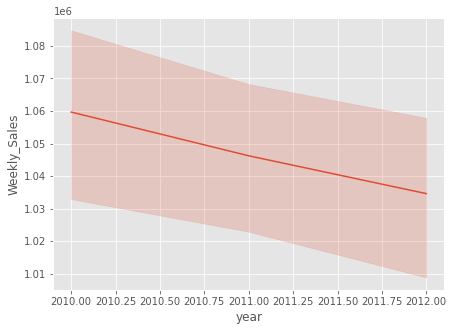

In [ ]:
plt.figure(figsize=(7,5))
sns.lineplot(data=train,x='year',y='Weekly_Sales')

감소하는 추세를 보여준다. 

## month & Weekly_Sales

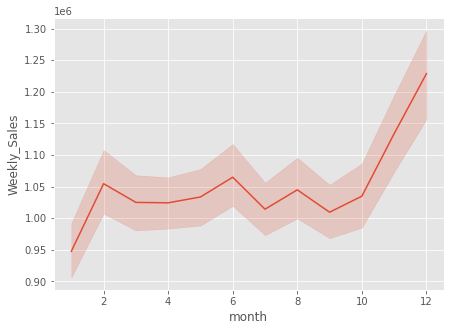

In [ ]:
plt.figure(figsize=(7,5))
sns.lineplot(data=train,x='month',y='Weekly_Sales')

12에 갑자기 증가하는 것을 볼 수 있음. 


## day & Weekly_Sales

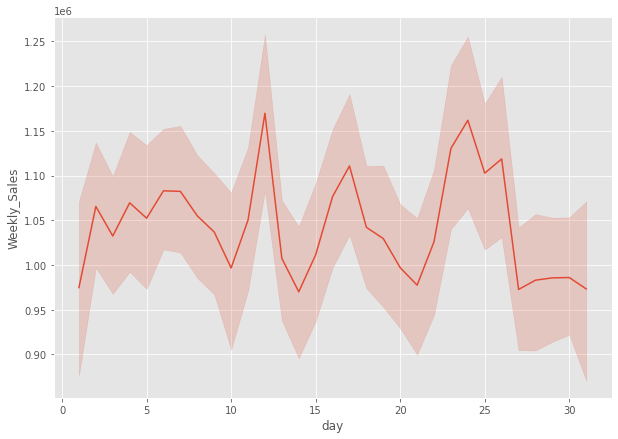

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(data=train,x='day',y='Weekly_Sales')

12일~13일에 갑자기 증가하다가 23 ~ 25일 쯤에 증가... 왤까

## weekday & Weekly_Sales

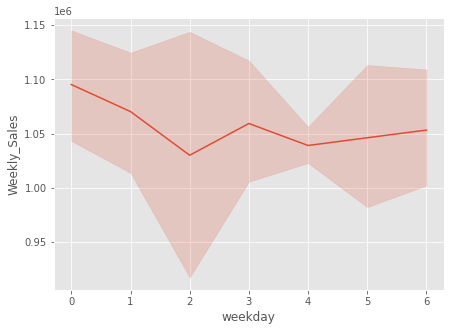

In [ ]:
plt.figure(figsize=(7,5))
sns.lineplot(data=train,x='weekday',y='Weekly_Sales')

- 월 : 0
- 화 : 1
- 수 : 2
..
..
.
.

월요일에 가장 많았다가 수요일에 가장 매출액이 낮다. 그리고 목요일에 갑자기 조금 증가 \

## 상관관계

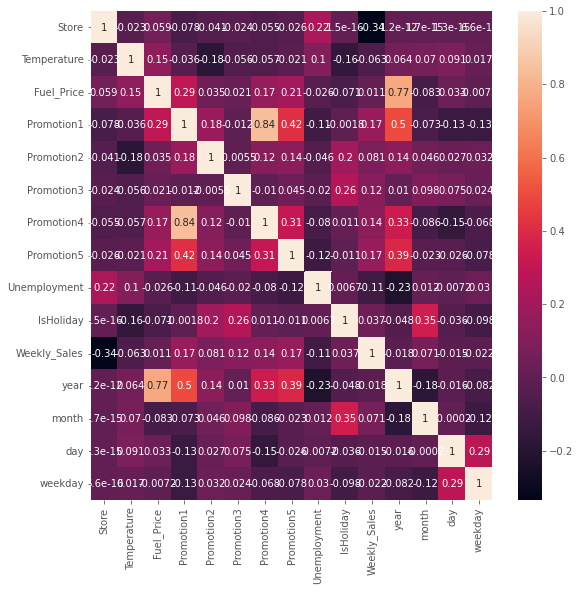

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(train.corr(),annot=True)

조금 재미있는 결과가 나왔다. year과 연료 가격이 꽤 큰 관계를 보인다. 그리고 프로모션1이 년도와 상관관계를 보이고 있다. 

# 파생변수

- 뭐가 있을까

# 데이터 나누기

In [ ]:
X_train=train.drop('Weekly_Sales',axis=1)
y_train=train['Weekly_Sales']
X_test=test

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)


(6255, 14)
(6255,)
(180, 14)


# 모델링

voting으로 앙상블 하려고 했는데 안돌아감

- 회귀
- 군집분석
- automl


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

estimators=[]

xgb=XGBRegressor()
estimators.append(xgb)

rf=RandomForestRegressor()
estimators.append(rf)

etr=ExtraTreesRegressor()
estimators.append(etr)

params=[]

params_xgb={
    'n_estimators':[50,100,150,200,300,400],
    'learning_rate':[0.05,0.1,0.15,0.2],
    'min_child_weight':[1,5,7,10],
    'max_depth':[5,6,7,9],
    'subsample':[0.1,0.3],
    #'colsample_bytree':[0.5,0.55,1]
}
params.append(params_xgb)

params_rf={
    'n_estimators':[100,120,150,200],
    'min_samples_split':[1,3,5,7,10]
}
params.append(params_rf)

params_etr={
    'n_estimators':[100,110,120,130,140,150]
}
params.append(params_etr)

In [ ]:
params

[{'learning_rate': [0.05, 0.1, 0.15, 0.2],
  'max_depth': [5, 6, 7, 9],
  'min_child_weight': [1, 5, 7, 10],
  'n_estimators': [50, 100, 150, 200, 300, 400],
  'subsample': [0.1, 0.3]},
 {'min_samples_split': [1, 3, 5, 7, 10], 'n_estimators': [100, 120, 150, 200]},
 {'n_estimators': [100, 110, 120, 130, 140, 150]}]

In [ ]:
estimators

[XGBRegressor(), RandomForestRegressor(), ExtraTreesRegressor()]

In [ ]:
from tqdm.auto import tqdm#진행도를 확인하는 것

def gridSearchCV(models,params):
  best_models=[]

  for i in tqdm(range(0,len(models))):
    model_grid=GridSearchCV(models[i],params[i],n_jobs=-1,verbose=1,cv=3)
    model_grid.fit(X_train,y_train)
    best_models.append(model_grid.best_estimator_)
  return best_models


best_model_list=gridSearchCV(estimators,params)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


KeyboardInterrupt: ignored

In [ ]:
best_model_list

In [ ]:
best_model=[
    
]

## 모델링 XGBoostRegressor

현재  187138.95977 | 15위

In [ ]:
from tqdm.auto import tqdm
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[50,100,150,200,300,400],
    'learning_rate':[0.05,0.1,0.15,0.2],
    'min_child_weight':[1,5,7,10],
    'max_depth':[5,6,7,9],
    'subsample':[0.1,0.3],
    'colsample_bytree':[0.5,0.55,1]  
}

xgb=XGBRegressor(random_state=0,n_jobs=-1)
grid=GridSearchCV(xgb,param_grid=params,cv=3,n_jobs=-1)
grid.fit(X_train,y_train)

print('최적의 하이퍼 파라미터:',grid.best_params_)
print('최고의 예측 정확도:',grid.best_score_)


[02:57:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최적의 하이퍼 파라미터: {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 100, 'subsample': 0.1}
최고의 예측 정확도: -0.35924845343060796


In [ ]:
pred=grid.predict(X_test)


In [ ]:
sample2=sample.copy()
sample2['Weekly_Sales']=pred
sample2.to_csv('xgb.csv',index=False)

In [ ]:
sample2

,id,Weekly_Sales
0,1,1.513573e+06
1,2,1.328201e+06
2,3,1.051834e+06
3,4,1.125155e+06
4,5,1.649692e+06
...,...,...
175,176,4.212480e+05
176,177,7.032872e+05
177,178,7.655172e+05
178,179,5.711506e+05


## 모델링 RandomForest

19위 | 	296844.0452271492	

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)




In [ ]:
sample=pd.read_csv('/content/sample_submission.csv')

In [ ]:
sample1=sample.copy()
sample1['Weekly_Sales']=pred
sample1.to_csv('rf.csv',index=False)

In [ ]:
sample1

,id,Weekly_Sales
0,1,1.694335e+06
1,2,1.703553e+06
2,3,1.438050e+06
3,4,1.377913e+06
4,5,1.859579e+06
...,...,...
175,176,3.316599e+05
176,177,7.713822e+05
177,178,7.584580e+05
178,179,7.019198e+05


# 데이터 전처리 3차

StandardScaler적용

In [ ]:
X_col=X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

st=StandardScaler()
for i in X_col:
  X_train[i]=st.fit_transform(X_train[i].values.reshape(-1,1))
  X_test[i]=st.fit_transform(X_test[i].values.reshape(-1,1))

display(X_train.head())
print()
display(X_test.head())

,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,year,month,day,weekday
0,-1.693979,-0.984245,-1.696293,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,0.040947,-0.278423,-1.186139,-0.422164,-1.548487,1.700809
1,-1.693979,-1.188298,-1.749003,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,0.040947,3.591657,-1.186139,1.695186,-1.548487,-0.422656
2,-1.693979,-1.112046,-1.823674,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,0.040947,-0.278423,-1.186139,-1.329600,0.382423,0.285166
3,-1.693979,-0.752268,-1.720452,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,0.040947,-0.278423,-1.186139,-1.329600,1.177504,0.285166
4,-1.693979,-0.759249,-1.579894,-0.405482,-0.170211,-0.082414,-0.265323,-0.371303,0.040947,-0.278423,-1.186139,-0.422164,-1.434904,-2.546121


,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,year,month,day,weekday
0,-1.693979,0.674420,-0.863006,1.576197,-0.368901,-0.198291,1.726332,0.060872,-0.239531,0.0,0.0,-1.643452,-0.929760,0.152499
1,-1.693979,0.141171,-0.921425,-0.388945,-0.368901,-0.418291,-0.294492,0.862308,-0.239531,0.0,0.0,1.063410,-0.929760,-1.677484
2,-1.693979,0.618793,-0.946984,-0.761478,-0.368901,-0.487490,-0.644432,-0.396683,-0.239531,0.0,0.0,0.290021,0.409094,0.762493
3,-1.693979,0.732924,-1.268291,-0.225065,0.355530,-0.464206,0.010333,-0.747818,-0.239531,0.0,0.0,0.290021,1.450426,0.762493
4,-1.616980,0.839382,-0.863006,0.907081,-0.368901,-0.376293,1.330850,0.140050,-0.493086,0.0,0.0,-1.643452,-0.929760,0.152499


In [90]:
y_train.head()

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

# 딥러닝

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device=='cuda':
  torch.cuda.manual_seed_all(777)

In [85]:
X_train_array=np.asarray(X_train)
y_train_array=np.asarray(y_train)
X_test_array=np.asarray(X_test)

In [98]:
y_train_tensor

tensor([1643690.8750, 1641957.5000, 1611968.1250,  ...,  702238.2500,
         723086.1875,  713173.9375])

In [97]:
y_train_array

array([1643690.9 , 1641957.44, 1611968.17, ...,  702238.27,  723086.2 ,
        713173.95])

In [96]:
X_train_tensor=torch.FloatTensor(X_train_array)
y_train_tensor=torch.Tensor(y_train_array)
X_test_tensor=torch.FloatTensor(X_test_array)

In [99]:
print(X_train_tensor.shape)
print(y_train_tensor.shape)
print(X_test_tensor.shape)

torch.Size([6255, 14])
torch.Size([6255])
torch.Size([180, 14])


In [120]:
learning_rate=0.01
epochs=2000
batch_size=100
drop_prob=0.3

In [121]:
from torch.utils.data import DataLoader,TensorDataset

train_dataset=TensorDataset(X_train_tensor,y_train_tensor)
train_loader=DataLoader(train_dataset,batch_size=batch_size)

In [102]:
class DNN(nn.Module):
  
  def __init__(self):
    super(DNN,self).__init__()
    self.linear1=torch.nn.Linear(14,7,bias=True)
    self.linear2=torch.nn.Linear(7,7,bias=True)
    self.linear3=torch.nn.Linear(7,7,bias=True)
    self.linear4=torch.nn.Linear(7,7,bias=True)
    self.linear5.torch.nn.Linear(7,7,bias=True)
    self.linear6.torch.nn.Linear(7,1,bias=True)
    self.relu=torch.nn.ReLU()
    self.dropout=torch.nn.Dropout(p=drop_prob)

    self.init_param()

  def forward(self,x):
    x=self.relu(self.linear1(x))
    x=self.dropout(x)
    x=self.relu(self.linear2(x))
    x=self.dropout(x)
    x=self.relu(self.linear3(x))
    x=self.dropout(x)
    x=self.relu(self.linear4(x))
    x=self.dropout(x)
    x=self.relu(self.linear5(x))
    x=self.dropout(x)
    x=self.linear6(x)

    return x

  def init_param(self):
    torch.nn.init_xavier_uniform_(self.linear1.weight)
    self.linear1.bias.data.fill_(0.01)
    torch.nn.init_xavier_uniform_(self.linear2.weight)
    self.linear2.bias.data.fill_(0.01)    
    torch.nn.init_xavier_uniform_(self.linear3.weight)
    self.linear3.bias.data.fill_(0.01)
    torch.nn.init_xavier_uniform_(self.linear4.weight)
    self.linear4.bias.data.fill_(0.01)
    torch.nn.init_xavier_uniform_(self.linear5.weight)
    self.linear5.bias.data.fill_(0.01)
    torch.nn.init_xavier_uniform_(self.linear6.weight)
    self.linear6.bias.data.fill_(0.01)

In [103]:
model=DNN().to(device)

AttributeError: ignored

In [122]:
linear1=torch.nn.Linear(14,7,bias=True)
linear2=torch.nn.Linear(7,7,bias=True)
linear3=torch.nn.Linear(7,7,bias=True)
linear4=torch.nn.Linear(7,7,bias=True)
linear5=torch.nn.Linear(7,7,bias=True)
linear6=torch.nn.Linear(7,1,bias=True)
relu=torch.nn.ReLU()
dropout=torch.nn.Dropout(p=drop_prob)

In [123]:
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)
torch.nn.init.xavier_uniform_(linear6.weight)

Parameter containing:
tensor([[ 0.5340, -0.0376,  0.0857, -0.1194, -0.2878,  0.5985,  0.3069]],
       requires_grad=True)

In [124]:
model=torch.nn.Sequential(
    linear1,relu,dropout,
    linear2,relu,dropout,
    linear3,relu,dropout,
    linear4,relu,dropout,
    linear5,relu,dropout,
    linear6
)

In [125]:
model

Sequential(
  (0): Linear(in_features=14, out_features=7, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=7, out_features=7, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=7, out_features=7, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.3, inplace=False)
  (9): Linear(in_features=7, out_features=7, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.3, inplace=False)
  (12): Linear(in_features=7, out_features=7, bias=True)
  (13): ReLU()
  (14): Dropout(p=0.3, inplace=False)
  (15): Linear(in_features=7, out_features=1, bias=True)
)

In [126]:
loss=torch.nn.MSELoss().to(device)
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [127]:
total_batch=len(train_loader)

model.train()

for epoch in range(2000):
  avg_cost=0
  for X,Y in train_loader:
    X=X.to(device)
    Y=Y.to(device)

    optimizer.zero_grad()
    hypothesis=model(X)
    cost=loss(hypothesis,Y)
    cost.backward()
    optimizer.step()

    avg_cost+=cost/total_batch

  print('epoch:','%04d' %(epoch+1),'cost=','{:.9f}'.format(avg_cost))

epoch: 0001 cost= 1411319201792.000000000
epoch: 0002 cost= 1245764517888.000000000
epoch: 0003 cost= 688080617472.000000000
epoch: 0004 cost= 657635409920.000000000
epoch: 0005 cost= 645517475840.000000000
epoch: 0006 cost= 630804512768.000000000
epoch: 0007 cost= 615461421056.000000000
epoch: 0008 cost= 628047872000.000000000
epoch: 0009 cost= 630022864896.000000000
epoch: 0010 cost= 623883517952.000000000
epoch: 0011 cost= 605637771264.000000000
epoch: 0012 cost= 614624067584.000000000
epoch: 0013 cost= 625958322176.000000000
epoch: 0014 cost= 592648601600.000000000
epoch: 0015 cost= 603983052800.000000000
epoch: 0016 cost= 587336122368.000000000
epoch: 0017 cost= 604045115392.000000000
epoch: 0018 cost= 600643141632.000000000
epoch: 0019 cost= 584687616000.000000000
epoch: 0020 cost= 594892554240.000000000
epoch: 0021 cost= 588276498432.000000000
epoch: 0022 cost= 574311170048.000000000
epoch: 0023 cost= 584843657216.000000000
epoch: 0024 cost= 582222610432.000000000
epoch: 0025 co

In [131]:
with torch.no_grad():
  model.eval()

  X_test=X_test_tensor.to(device)
  y=model(X_test)
 

In [129]:
y=y.cpu().numpy()

In [130]:
sample=pd.read_csv('/content/sample_submission.csv')
sample.head()

,id,Weekly_Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [132]:
sample['Weekly_Sales']=y
sample.head()

,id,Weekly_Sales
0,1,1.120712e+06
1,2,1.035524e+06
2,3,1.024008e+06
3,4,1.053543e+06
4,5,1.059785e+06


In [133]:
sample.to_csv('sample1.csv',index=False)